In [39]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import constants 
from matplotlib.patches import Patch
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 23
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


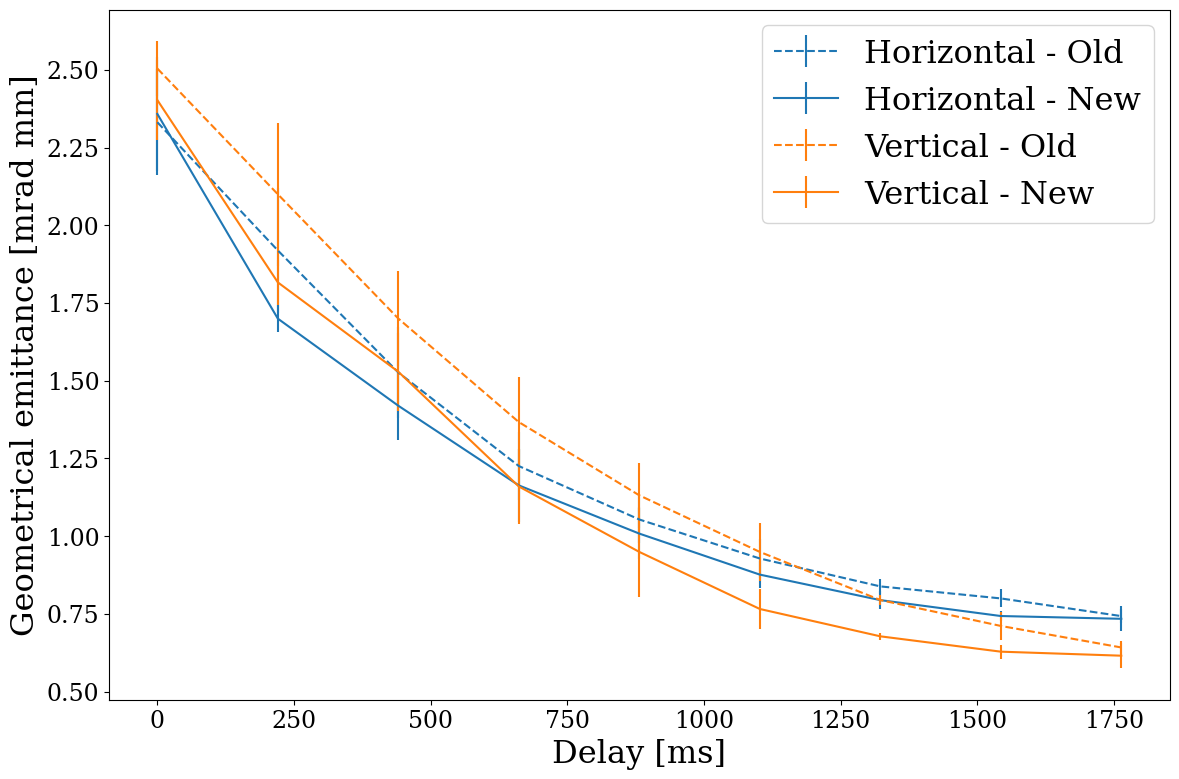

In [40]:
import numpy as np
import matplotlib.pyplot as plt

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load and unpack horizontal data
data_old_horizontal = np.load('results/optimize/horizontal_old.npz')
data_new_horizontal = np.load('results/optimize/horizontal_new.npz')

h_delay_unique_old = data_old_horizontal['h_delay_unique'][1:]
means_h_old = data_old_horizontal['means_h'][1:]
stds_h_old = data_old_horizontal['stds_h'][1:]

h_delay_unique_new = data_new_horizontal['h_delay_unique'][1:]
means_h_new = data_new_horizontal['means_h'][1:]
stds_h_new = data_new_horizontal['stds_h'][1:]

# Shift delay values
h_delay_unique_old -= h_delay_unique_old.min()
h_delay_unique_new -= h_delay_unique_new.min()

# Load and unpack vertical data
data_old_vertical = np.load('results/optimize/vertical_old.npz')
data_new_vertical = np.load('results/optimize/vertical_new.npz')

v_delay_unique_old = data_old_vertical['v_delay_unique'][1:]
means_v_old = data_old_vertical['means_v'][1:]
stds_v_old = data_old_vertical['stds_v'][1:]

v_delay_unique_new = data_new_vertical['v_delay_unique'][1:]
means_v_new = data_new_vertical['means_v'][1:]
stds_v_new = data_new_vertical['stds_v'][1:]

# Shift delay values
v_delay_unique_old -= v_delay_unique_old.min()
v_delay_unique_new -= v_delay_unique_new.min()

# Plotting
plt.figure(figsize=(12, 8))  # Create a figure for plotting
plt.errorbar(h_delay_unique_old, means_h_old, yerr=stds_h_old, label='Horizontal - Old', linestyle='--',color=cycle[0])
plt.errorbar(h_delay_unique_new, means_h_new, yerr=stds_h_new, label='Horizontal - New',color=cycle[0])

plt.errorbar(v_delay_unique_old, means_v_old, yerr=stds_v_old, label='Vertical - Old', linestyle='--',color=cycle[1])
plt.errorbar(v_delay_unique_new, means_v_new, yerr=stds_v_new, label='Vertical - New',color=cycle[1])

plt.xlabel('Delay [ms]')
plt.ylabel('Geometrical emittance [mrad mm]')

plt.tight_layout()
plt.legend()
plt.savefig('figures/Optimization.png', dpi=300)
plt.show()
